# sgRNA On-Target Prediction for CRISPR based tools


## CRISPR/CAS9 system

The CRISPR/Cas9 system, originally derived from bacterial immune defenses against viral DNA, uses clustered regularly interspaced short palindromic repeats (CRISPR) to recognize and cut target DNA. CRISPR guides single guide RNA (sgRNA) to locate and cleave viral DNA fragments through complementary base pairing at specific DNA sites with a PAM motif. However, Cas9 nucleases can sometimes tolerate partial mismatches between the sgRNA and DNA, leading to off-target effects where non-target DNA is unintentionally cut. Minimizing these off-target effects and accurately predicting on-target sgRNA activity are key research priorities for effective CRISPR applications.

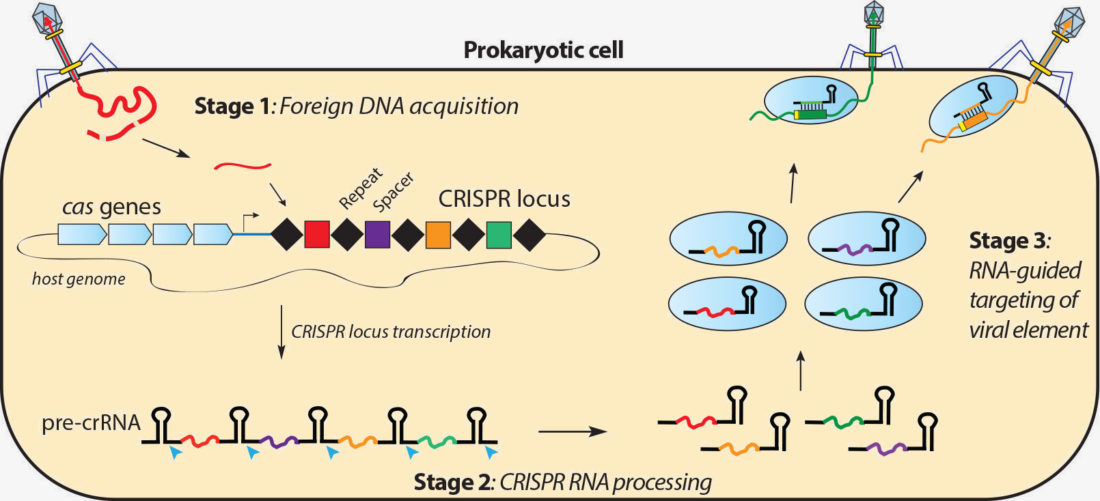


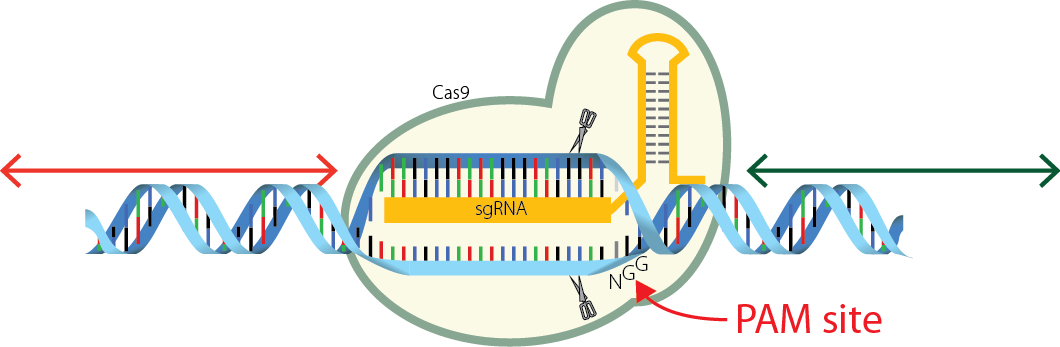




## On-Target Prediction

CRISPR/Cas9 is a powerful gene-editing technology that enables precise editing through a complex of sgRNA and Cas9 proteins. High specificity and efficiency in sgRNA targeting are essential for accuracy. Existing machine learning models predict sgRNA targeting efficacy, but there is room for improvement in prediction accuracy.

In this lecture, we will present a CNN-based approach to sgRNA on-target prediction. This framework, called CNN-XG, combines CNN for feature extraction and XGBoost for regression. This dual framework outperforms previous deep learning approaches in predicting sgRNA on-target activity.


The concept of CNN-XG is to train a dedicated CNN network to extract initial genetic and epigenetic information from sgRNA. The features obtained through convolution and pooling are then provided to XGBoost for prediction and evaluation.

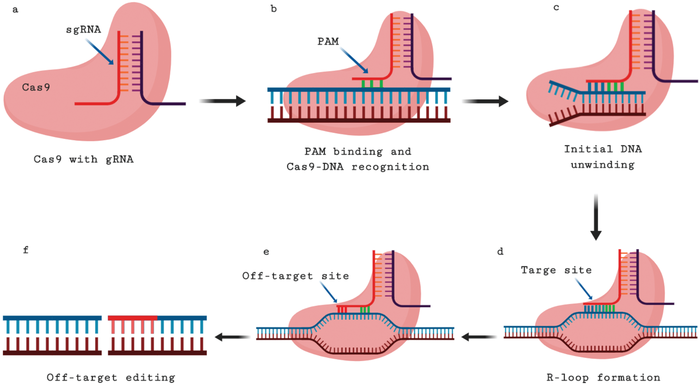


# What is this lesson based on? 


This lecture is inspired by the publication "CNN-XG: A Hybrid Framework for sgRNA On-Target Prediction!" Much of the code and methodologies discussed can be accessed in the corresponding GitHub repository, allowing you to follow along and apply these techniques to your own data.


##  CNN-XG: A Hybrid Framework for sgRNA On-Target Prediction 
### Abstract


As the third generation gene editing technology, Crispr/Cas9 has a wide range of applications. The success of Crispr depends on the editing of the target gene via a functional complex of sgRNA and Cas9 proteins. Therefore, highly specific and high on-target cleavage efficiency sgRNA can make this process more accurate and efficient. Although there are already many sophisticated machine learning or deep learning models to predict the on-target cleavage efficiency of sgRNA, prediction accuracy remains to be improved. XGBoost is good at classification as the ensemble model could overcome the deficiency of a single classifier to classify, and we would like to improve the prediction efficiency for sgRNA on-target activity by introducing XGBoost into the model. We present a novel machine learning framework which combines a convolutional neural network (CNN) and XGBoost to predict sgRNA on-target knockout efficacy. Our framework, called CNN-XG, is mainly composed of two parts: a feature extractor CNN is used to automatically extract features from sequences and predictor XGBoost is applied to predict features extracted after convolution. Experiments on commonly used datasets show that CNN-XG performed significantly better than other existing frameworks in the predicted classification mode.



# Convolutional Networks


Convolutional Neural Networks (CNNs) are deep neural networks that extract information from input data by sliding a kernel over the data, thereby learning local features in small portions.
Key layers in CNNs include:

1. **Convolutional Layers**: Extract features by applying filters across the input. Each filter captures specific patterns (like edges or textures).
2.    **Pooling Layers**: Downsample the feature maps, reducing dimensionality and computation while retaining essential information.
3.    **Fully Connected Layers**: Connect all neurons to every neuron in the previous layer, allowing the network to make complex decisions based on the extracted features.

CNNs can be used to extract features from input data, that are relevant for downstream classification tasks. 
Key to CNNs are a number of properties that make them effective at extracting features from the local surrounding of any input. 

**Translation Invariance** ensures that shifting the input will not compromise the detection of features, while **Parameter sharing** reduces the number of essential paramerters to be learned. This also reduces the probabilty to overfit to the data.  


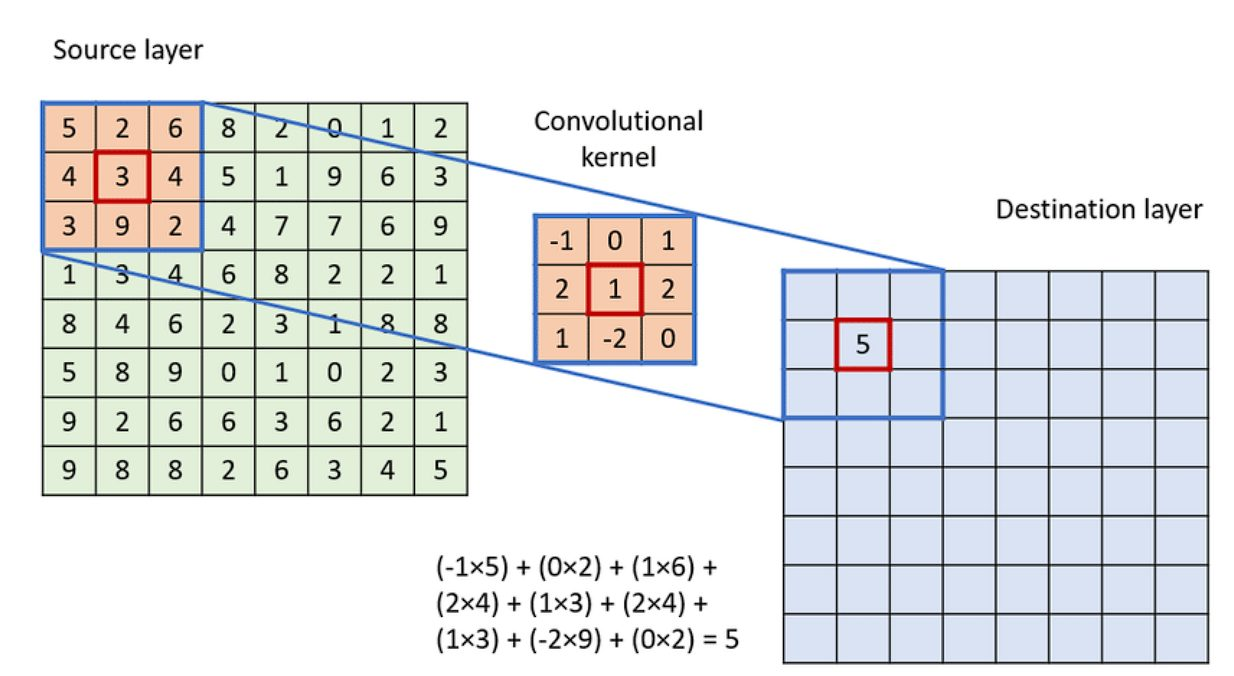

# What are we trying to achieve in detail?

CNN-XG is based on 4 distinct steps, we will have to achieve:

1. **Embedding Creation**: First, we create embeddings for our input sequences and, subsequently, for relevant epigenetic features

2. **Feature Extraction**: We develop a CNN-based feature extractor to capture features from the sgRNA and epigenetic information

2. **Random Forest**: We use a random forest to select promising features from our CNN feature extractor.

3. **Regression**: Using extreme gradient boosting, we build an XGBoost regressor based on the extracted features

4. **Prediction**: Finally, we use the model to predict sgRNA cleavage efficacy



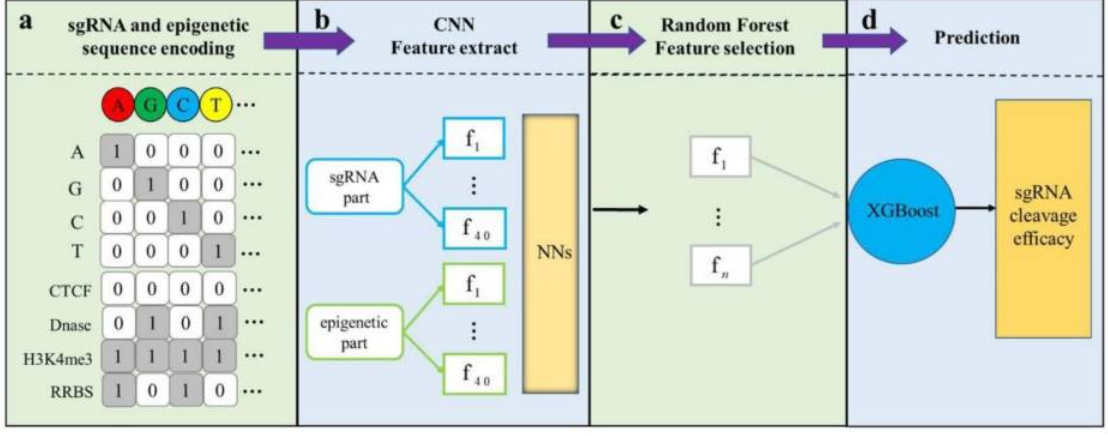

# Where are we getting our data from?




In [1]:
import pandas as pd
import numpy as np

train_file = "./HEK293T.csv"
pd.read_csv(train_file)

,chr,start,end,direction,seq,ctcf,dnase,h3k4me3,rrbs,Normalized efficacy,Efficacy
0,chr16,28602245,28602267,-,GGCTGCTTTACCCGCTGTGGGGG,AAAAAAAAAAAAAAAAAAAAAAA,AAAAAAAAAAAAAAAAAAAAAAA,AAAAAAAAAAAAAAAAAAAAAAA,NNNNNNNNNNNNNNNNNNNNNNN,0.323783,1
1,chr16,28602131,28602153,-,TCCGGGTTGGCCTTCCACTGGGG,NNNNNNNNNNNNNNNNNNNNNNN,AAAAAAAAAAAAAAAAAAAAAAA,AAAAAAAAAAAAAAAAAAAAAAA,NNANNNNNNNNNNNNNNNNNNNN,0.349162,1
2,chr16,28600418,28600440,+,CAGCATCCTTCGGAAAGCTCTGG,AAAAAAAAAAAAAAAAAAAAAAA,AAAAAAAAAAAAAAAAAAAAAAA,AAAAAAAAAAAAAAAAAAAAAAA,NNNNNNNNNNNNNNNNNNNNNNN,0.280197,1
3,chr16,28602206,28602228,-,CGGTAGAAGCAGGTAGTCTGGGG,AAAANNNNNNNNNNNNNNNNNNN,AAAAAAAAAAAAAAAAAAAAAAA,AAAAAAAAAAAAAAAAAAAAAAA,NNNNNNNNNNNNNNNNNNNNNNN,0.226491,1
4,chr16,28602121,28602143,+,CATCCCGCTGCCCCAGTGGAAGG,NNNNNNNNNNNNNNNNNNNNNNN,AAAAAAAAAAAAAAAAAAAAAAA,AAAAAAAAAAAAAAAAAAAAAAA,NNNNNAANNNNNNNNNNNNNNNN,0.255358,1
...,...,...,...,...,...,...,...,...,...,...,...
2328,chr4,7045471,7045493,+,CGGCGGGCGCTTCACGCTCTGGG,AAAAAAAAAAAAAAAAAAAAAAA,AAAAAAAAAAAAAAAAAAAAAAA,AAAAAAAAAAAAAAAAAAAAAAA,NNNNNNNNNNNNNNNNNNNNNNN,0.485874,1
2329,chr4,7056389,7056411,+,CTGCAGCGGTACCGGCGAAACGG,NNNNNNNNNNNNNNNNAAAAAAA,AAAAAAAAAAAAAAAAAAAAAAA,NNNNNNNNNNNNNNNNNNNNNNN,NNNNNNNNNNNNANNANNNNANN,0.512625,1
2330,chr4,7056698,7056720,-,AGGACTTTGTCCAGGTAGCTAGG,NNNNNNNNNNNNNNNNNNNNNNN,AAAAAAAAAAAAAAAAAAAAAAA,NNNNNNNNNNNNNNNNNNNNNNN,NNNNNNNNNNNNNNNNNNNNNNN,0.499876,1
2331,chr4,7056307,7056329,-,ACTCCTTGCATGACATGAACTGG,NNNNNNNNNNNNNNNNNNNNNNN,AAAAAAAAAAAAAAAAAAAAAAA,NNNNNNNNNNNNNNNNNNNNNNN,NNNNNNNNNNNNNNNNNNNNNNN,0.555058,1


In [2]:
pd.read_csv(train_file).columns

Index(['chr', 'start', 'end', 'direction', 'seq', 'ctcf', 'dnase', 'h3k4me3',
       'rrbs', 'Normalized efficacy', 'Efficacy'],
      dtype='object')

## What do they different columns mean?

1. **chr**: The chromosome where the sgRNA target site is located.

2. **start**: The starting position of the target sequence on the chromosome.

3. **end**: The ending position of the target sequence

4. **direction**: strand orientation of the sgRNA target site, '+' for forward strand and '-' for the reverse strand.

5. **seq**: sequence of the sgRNA

6. **ctcf**: CTCF binding sites, which may influence gene regulation. CTCF (CCCTC-binding factor) is an important transcriptional regulator, and its presence might affect sgRNA binding or activity

7. **dnase**: Indicates DNase hypersensitivity, which reflects regions of open chromatin that are accessible to binding proteins, like transcription factors, making these areas more likely to interact with sgRNA

7. **h3k4me3**: Refers to the presence of the H3K4me3 histone modification, which is often associated with active transcription and promoter regions, potentially affecting sgRNA binding or activity

8. **rrbs**: Refers to DNA methylation data derived from Reduced Representation Bisulfite Sequencing (RRBS). Methylation levels here might correlate with gene regulation, influencing sgRNA binding or off-target activity

9. **Normalized efficacy**: The normalized prediction score for sgRNA’s on-target efficacy.

10.  **Efficacy**: The raw prediction score for the sgRNA’s on-target cleavage efficacy, indicating how effectively the sgRNA is expected to target and edit the specified sequence

Were are only interested in doing the prediction based on the sequence only. So we disregard the rest of the data for now. 


In [3]:
pd.read_csv(train_file, usecols=[4, 9])

,seq,Normalized efficacy
0,GGCTGCTTTACCCGCTGTGGGGG,0.323783
1,TCCGGGTTGGCCTTCCACTGGGG,0.349162
2,CAGCATCCTTCGGAAAGCTCTGG,0.280197
3,CGGTAGAAGCAGGTAGTCTGGGG,0.226491
4,CATCCCGCTGCCCCAGTGGAAGG,0.255358
...,...,...
2328,CGGCGGGCGCTTCACGCTCTGGG,0.485874
2329,CTGCAGCGGTACCGGCGAAACGG,0.512625
2330,AGGACTTTGTCCAGGTAGCTAGG,0.499876
2331,ACTCCTTGCATGACATGAACTGG,0.555058


# Sequence Encoding


The sgRNA and epigenetic information were encoded using one-hot encoding, a common machine learning method. This approach captured both nucleotide (A, G, C, T) and epigenetic information at specific genomic positions. For a 23-base sgRNA sequence, each nucleotide was represented in a 4 × 23 matrix, where each row corresponded to one nucleotide (A, G, C, or T), with a “1” indicating presence and a “0” indicating absence at each position. Similarly, epigenetic data were encoded in a 4 × 23 matrix, with “1” or “0” indicating the presence or absence of specific epigenetic markers. These matrices were then input into a convolutional neural network for training. Alternatively it is also possible to use the embeddings provided by large language models for sequences as an start of point. 

## Why not use a class based encoding?

Assigning integers (e.g., A=1, C=2, G=3, T=4) implies an ordinal relationship among nucleotides that doesn’t exist; one-hot encoding treats each nucleotide as a distinct, non-ordinal category. With integers, a model might infer that C (2) is somehow “closer” to A (1) than to G (3), leading to inaccurate or misleading relationships.

Additionally, in convolutional neural networks (CNNs), one-hot encoding enables nucleotide sequences to be represented as matrices or multi-channel images. This format aligns well with CNN architectures, allowing the model to apply filters across channels to learn spatial patterns in the sequence data (e.g., motifs or clusters of nucleotides). Such spatial learning is challenging with single-dimensional integer inputs.


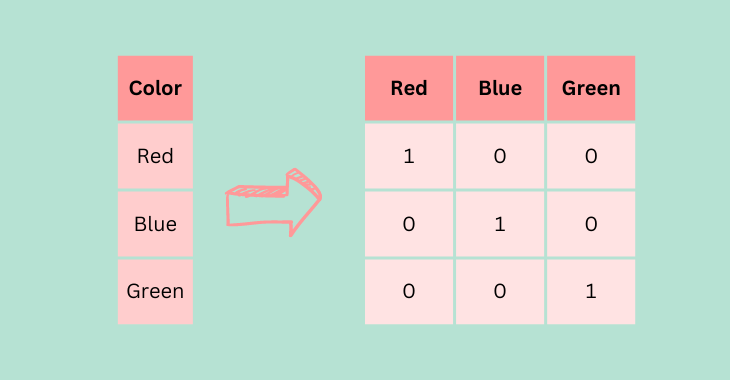

In [4]:
sequences = pd.read_csv(train_file, usecols=[4]).values

bases = "ACGT"
database = []
for seq in sequences:
    encoded = []
    for base in seq[0]:
        encoding = np.zeros(len(bases))
        encoding[bases.index(base.upper())] = 1
        encoded.append(encoding)
    database.append(encoded)


In [24]:
"""
now putting it all together
"""

def grna_preprocess(lines):
    length = 23
    data_n = len(lines)
    seq = np.zeros((data_n, length, 4), dtype=int)

    for l in range(data_n):
        data = lines[l]
        seq_temp = data
        for i in range(length):
            if seq_temp[i] in "Aa":
                seq[l, i, 0] = 1
            elif seq_temp[i] in "Cc":
                seq[l, i, 1] = 1
            elif seq_temp[i] in "Gg":
                seq[l, i, 2] = 1
            elif seq_temp[i] in "Tt":
                seq[l, i, 3] = 1
    return seq
def load_data_sequence(train_file):
    train_data = pd.read_csv(train_file, usecols=[4, 9])
    train_data = np.array(train_data)
    train_seq, train_y = train_data[:, 0], train_data[:, 1]
    train_seq = grna_preprocess(train_seq)

    return train_seq,np.array(train_y)

# Creating the model


First we create a simple convolutional model, based on the input sequence only. Later on we include epigenetic features characterizing the sgRNA and add an extrac channel.



In [12]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class ConvBranch(nn.Module):
    def __init__(self):
        super(ConvBranch, self).__init__()
        self.conv1 = nn.Conv1d(4, 64, kernel_size=3)
        self.bn1 = nn.BatchNorm1d(64)
        self.conv2 = nn.Conv1d(64, 128, kernel_size=3)
        self.bn2 = nn.BatchNorm1d(128)
        self.conv3 = nn.Conv1d(128, 256, kernel_size=3)
        self.bn3 = nn.BatchNorm1d(256)

        self.fc1 = nn.Linear(256 * 1, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, 32)

        self.dropout = nn.Dropout(0.2)

    def forward(self, x):
        x = self.conv1(x.transpose(1, 2))
        x = self.bn1(x)
        x = F.relu(x)
        x = F.max_pool1d(x, 2)
        x = self.dropout(x)

        x = self.conv2(x)
        x = self.bn2(x)
        x = F.relu(x)
        x = F.max_pool1d(x, 2)
        x = self.dropout(x)

        x = self.conv3(x)
        x = self.bn3(x)
        x = F.relu(x)
        x = F.max_pool1d(x, 2)
        x = self.dropout(x)

        x = x.view(x.size(0), -1)
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = F.relu(self.fc2(x))
        x = self.dropout(x)
        x = F.relu(self.fc3(x))
        x = self.dropout(x)
        x = F.relu(self.fc4(x))
        return x

class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.seq_branch = ConvBranch()
        self.fc_out = nn.Linear(32 , 1)  
        self.sigmoid = nn.Sigmoid()

    def forward(self, seq_input):
        seq_out = self.seq_branch(seq_input)
        
        output = self.sigmoid(self.fc_out(seq_out))
        return seq_out, output



### Pre-training the CNN feature extractor

Since data with complete epigenetic information tends to be sparse, we pretrain our CNN feature extraction model on 200,000 sequences. These sequences were generated using a data augmentation strategy specifically designed to create biologically meaningful knockout efficacy labels for the training process.

#### Why can't we just use standard data augmentation strategies?

In standard data augmentation, modifying a few pixels in an image typically doesn’t change its meaning—a rotated picture of a cat is still recognized as a cat. However, with biological data, the situation is more complex. Adding noise to single-cell data might alter the class of a cell, and changing just a few nucleotides in a guide RNA can have a significant impact on its efficacy.


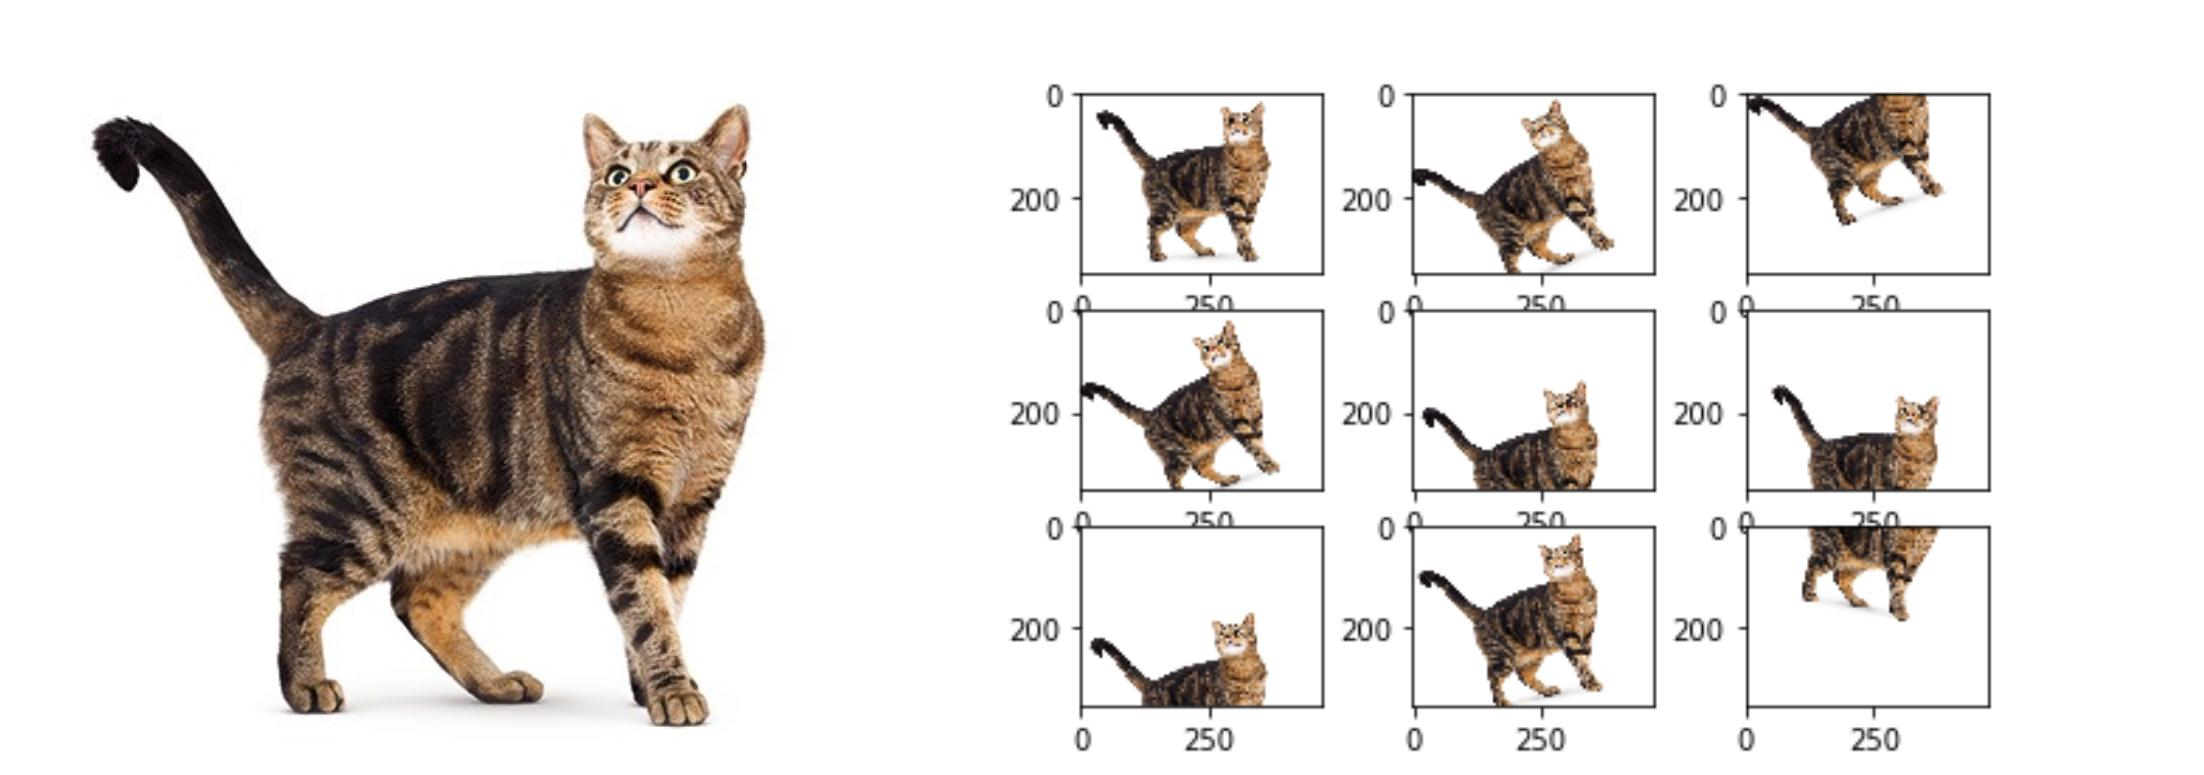

#### What do we do instead?


Previous studies have shown that sgRNAs with two mismatches in the first two positions from the 5′ end usually have no effect on cleavage efficacy. Building on this insight, the authors extended the original sgRNA seeds by introducing two mismatches in the PAM-distal region of each sequence. These newly generated sgRNAs retained identical efficacy labels to their corresponding seeds, as they shared the same epigenetic profiles. This approach resulted in approximately 0.2 million non-redundant sgRNAs with biologically meaningful knockout efficacy labels for training the model.

In [17]:
import pandas as pd

df = pd.read_csv("./benchmark_dataset.csv")
sgRNAs = grna_preprocess(df["sgRNA"])
target = list(df["Efficacy"])

In [18]:
from torch.utils.data import DataLoader, Dataset
from sklearn.model_selection import train_test_split

class MyDataset(Dataset):
    def __init__(self, data, targets, transform=None):
        self.data = data
        self.targets = targets

    def __getitem__(self, index):

        x = self.data[index]
        y = 1 if self.targets[index] > 0.5 else 0
        return x, y
    
    def __len__(self):
        return len(self.data)

In [19]:
import torch.optim as optim

def train_model(model, train_loader, val_loader, num_epochs=20, learning_rate=0.001):
    
    # Loss function and optimizer
    criterion = nn.BCELoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)
    
    # Training loop
    for epoch in range(num_epochs):
        model.train()  # Set the model to training mode
        running_loss = 0.0
        correct_predictions = 0
        total_predictions = 0
        
        # Training phase
        for seq_inputs, labels in train_loader:
            
            optimizer.zero_grad()
            
            _, outputs = model(seq_inputs)
            loss = criterion(outputs.squeeze().to(float), labels.to(float))
            
            loss.backward()
            optimizer.step()
            
            running_loss += loss.item() * labels.size(0)
            predictions = (outputs > 0.5).float()  # Assuming binary classification
            correct_predictions += (predictions.squeeze() == labels).sum().item()
            total_predictions += labels.size(0)
        
        # Calculate average loss and accuracy
        epoch_loss = running_loss / len(train_loader.dataset)
        epoch_accuracy = correct_predictions / total_predictions

        # Validation phase
        model.eval()  # Set the model to evaluation mode
        val_loss = 0.0
        val_correct = 0
        val_total = 0
        
        with torch.no_grad():
            for seq_inputs, labels in val_loader:
                
                # Forward pass
                _, outputs = model(seq_inputs)
                loss = criterion(outputs.squeeze().to(float), labels.to(float))
                
                # Update validation loss and accuracy
                val_loss += loss.item() * labels.size(0)
                predictions = (outputs > 0.5).float()
                val_correct += (predictions.squeeze() == labels).sum().item()
                val_total += labels.size(0)
        

        val_loss /= len(val_loader.dataset)
        val_accuracy = val_correct / val_total
        
        print(f"Epoch {epoch + 1}/{num_epochs}")
        print(f"Train Loss: {epoch_loss:.4f}, Train Accuracy: {epoch_accuracy:.4f}")
        print(f"Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_accuracy:.4f}")
        
    return

In [20]:
# Initialize model
   

X_train, X_test, y_train, y_test = train_test_split(sgRNAs,target, test_size=0.1)


model = Model()

dataset_train = MyDataset(torch.tensor(X_train, dtype = torch.float32), 
                          torch.tensor(y_train, dtype = torch.float64))
dataset_test = MyDataset(torch.tensor(X_test, dtype = torch.float32), 
                         torch.tensor(y_test, dtype = torch.float64))



train_loader = DataLoader(dataset_train, batch_size=32, shuffle=True)
val_loader = DataLoader(dataset_test, batch_size=32, shuffle=True)

train_model(model, train_loader, val_loader, num_epochs=100, learning_rate=0.001)




Epoch 1/100
Train Loss: 0.6122, Train Accuracy: 0.6680
Validation Loss: 0.5462, Validation Accuracy: 0.7149
Epoch 2/100
Train Loss: 0.5552, Train Accuracy: 0.7123
Validation Loss: 0.4561, Validation Accuracy: 0.7850
Epoch 3/100
Train Loss: 0.4972, Train Accuracy: 0.7529
Validation Loss: 0.3661, Validation Accuracy: 0.8634
Epoch 4/100
Train Loss: 0.4404, Train Accuracy: 0.7915
Validation Loss: 0.2618, Validation Accuracy: 0.9107
Epoch 5/100
Train Loss: 0.3983, Train Accuracy: 0.8171
Validation Loss: 0.2378, Validation Accuracy: 0.9332
Epoch 6/100
Train Loss: 0.3632, Train Accuracy: 0.8368
Validation Loss: 0.2127, Validation Accuracy: 0.9515
Epoch 7/100
Train Loss: 0.3392, Train Accuracy: 0.8501
Validation Loss: 0.1624, Validation Accuracy: 0.9593
Epoch 8/100
Train Loss: 0.3174, Train Accuracy: 0.8623
Validation Loss: 0.1515, Validation Accuracy: 0.9639
Epoch 9/100
Train Loss: 0.3022, Train Accuracy: 0.8696
Validation Loss: 0.1458, Validation Accuracy: 0.9696
Epoch 10/100
Train Loss: 0.2

Epoch 77/100
Train Loss: 0.1502, Train Accuracy: 0.9371
Validation Loss: 0.0521, Validation Accuracy: 0.9773
Epoch 78/100
Train Loss: 0.1481, Train Accuracy: 0.9372
Validation Loss: 0.0406, Validation Accuracy: 0.9776
Epoch 79/100
Train Loss: 0.1479, Train Accuracy: 0.9378
Validation Loss: 0.0400, Validation Accuracy: 0.9775
Epoch 80/100
Train Loss: 0.1468, Train Accuracy: 0.9387
Validation Loss: 0.0408, Validation Accuracy: 0.9761
Epoch 81/100
Train Loss: 0.1449, Train Accuracy: 0.9387
Validation Loss: 0.0402, Validation Accuracy: 0.9770
Epoch 82/100
Train Loss: 0.1485, Train Accuracy: 0.9381
Validation Loss: 0.0428, Validation Accuracy: 0.9762
Epoch 83/100
Train Loss: 0.1479, Train Accuracy: 0.9377
Validation Loss: 0.0400, Validation Accuracy: 0.9750
Epoch 84/100
Train Loss: 0.1472, Train Accuracy: 0.9380
Validation Loss: 0.0407, Validation Accuracy: 0.9762
Epoch 85/100
Train Loss: 0.1476, Train Accuracy: 0.9376
Validation Loss: 0.0397, Validation Accuracy: 0.9756
Epoch 86/100
Train 

# Training of the pre-trained model and evaluation

In [25]:
X, y = load_data_sequence(train_file = "./HEK293T.csv")

In [27]:
# Initialize model
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.1)

dataset_train = MyDataset(torch.tensor(X_train, dtype = torch.float32), 
                          torch.tensor(list(y_train), dtype = torch.float32))
dataset_test = MyDataset(torch.tensor(X_test, dtype = torch.float32), 
                         torch.tensor(list(y_test), dtype = torch.float32))


train_loader = DataLoader(dataset_train, batch_size=32, shuffle=True)
val_loader = DataLoader(dataset_test, batch_size=32, shuffle=True)

train_model(model, train_loader, val_loader, num_epochs=20, learning_rate=0.001)

[0.17229779 0.457858682 0.419135017 ... 0.157640723 0.27450725 0.181334761]
Epoch 1/20
Train Loss: 1.8258, Train Accuracy: 0.6117
Validation Loss: 0.2314, Validation Accuracy: 0.9786
Epoch 2/20
Train Loss: 0.1918, Train Accuracy: 0.9662
Validation Loss: 0.1400, Validation Accuracy: 0.9786
Epoch 3/20
Train Loss: 0.1741, Train Accuracy: 0.9719
Validation Loss: 0.1380, Validation Accuracy: 0.9786
Epoch 4/20
Train Loss: 0.1521, Train Accuracy: 0.9714
Validation Loss: 0.1281, Validation Accuracy: 0.9786
Epoch 5/20
Train Loss: 0.1700, Train Accuracy: 0.9728
Validation Loss: 0.1390, Validation Accuracy: 0.9786
Epoch 6/20
Train Loss: 0.1400, Train Accuracy: 0.9719
Validation Loss: 0.1296, Validation Accuracy: 0.9786
Epoch 7/20
Train Loss: 0.1433, Train Accuracy: 0.9728
Validation Loss: 0.1343, Validation Accuracy: 0.9786
Epoch 8/20
Train Loss: 0.1293, Train Accuracy: 0.9714
Validation Loss: 0.1118, Validation Accuracy: 0.9786
Epoch 9/20
Train Loss: 0.1652, Train Accuracy: 0.9724
Validation Los

# Creating epigenetic features for the sgRNA allignment

We previously did see that our input file includes additional information that characterizes the DNA sequence where the sgRNA allings to. The following information is in particular interesting to us:


1. **ctcf**: CTCF binding sites, which may influence gene regulation. CTCF (CCCTC-binding factor) is an important transcriptional regulator, and its presence might affect sgRNA binding or activity

7. **dnase**: Indicates DNase hypersensitivity, which reflects regions of open chromatin that are accessible to binding proteins, like transcription factors, making these areas more likely to interact with sgRNA

7. **h3k4me3**: presence of H3K4me3 histone modification, which is often associated with active transcription and promoter regions, potentially affecting sgRNA binding or activity

8. **rrbs**: Refers to DNA methylation data derived from Reduced Representation Bisulfite Sequencing (RRBS). Methylation levels here might correlate with gene regulation, influencing sgRNA binding or off-target activity


This information helps us understand a) whether the DNA region might be occupied (ctcf) and can therefor not be accessed, b) whether the DNA regions is wrapped up within chromatin (dnase hypersensitivity, histone modification), whether the DNA is methylated (rrrbs). 



# DNA methylation

DNA methylation involves the addition of a methyl group (-CH₃) to the cytosine base, typically forming 5-methylcytosine (5mC). As an epigenetic modification, it regulates gene expression, chromatin structure, and genomic stability. The process of DNA methylation is dynamic and can be divided into three stages:

1. **De novo DNA methylation**: The establishment of new methylation patterns on previously unmethylated DNA.
2. **DNA methylation maintenance**: The preservation of existing methylation patterns during DNA replication.
3. **DNA demethylation**: The removal or reversal of methylation marks.

## What is RRBS?

Reduced Representation Bisulfite Sequencing (RRBS) is a cost-effective, high-resolution method to profile DNA methylation genome-wide, focusing on regions enriched in CpG sites.It utilizes bisulfite treatment to convert unmethylated cytosines to uracil (read as thymine during sequencing), while methylated cytosines remain unchanged
This allows for effective mapping of methylated positions.

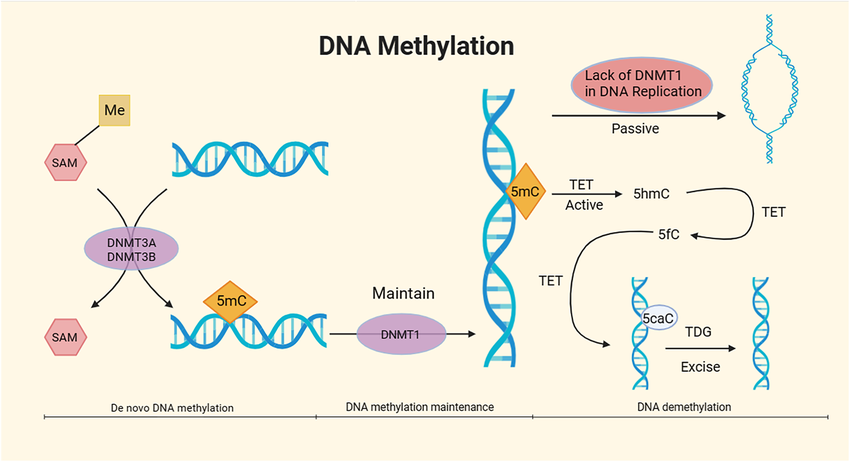

## Methylation moderates the DNA accessibility

Histones are proteins that package and organize DNA into nucleosomes. DNA wraps around histone octamers (composed of two each of H2A, H2B, H3, and H4 histones), forming chromatin, which in turn compacts into chromosomes. By packaging DNA this way, the cell can fit it into the nucleus and protect it from degradation by shielding it from nucleases and other degrading agents. Histones also influence DNA accessibility depending on how tightly the DNA-protein complex is packed. Tightly packed **heterochromatin** is transcriptionally inactive, while loosely packed **euchromatin** is transcriptionally active.

### H3K4me3 Histone Modification

H3K4me3 is a well-known histone modification that acts as a signal for the transcription machinery. H3K4me3 facilitates the assembly of the pre-initiation complex for transcription. It is usually located in **euchromatin** regions, which are accessible areas where transcription and interactions with tRNA can occur.

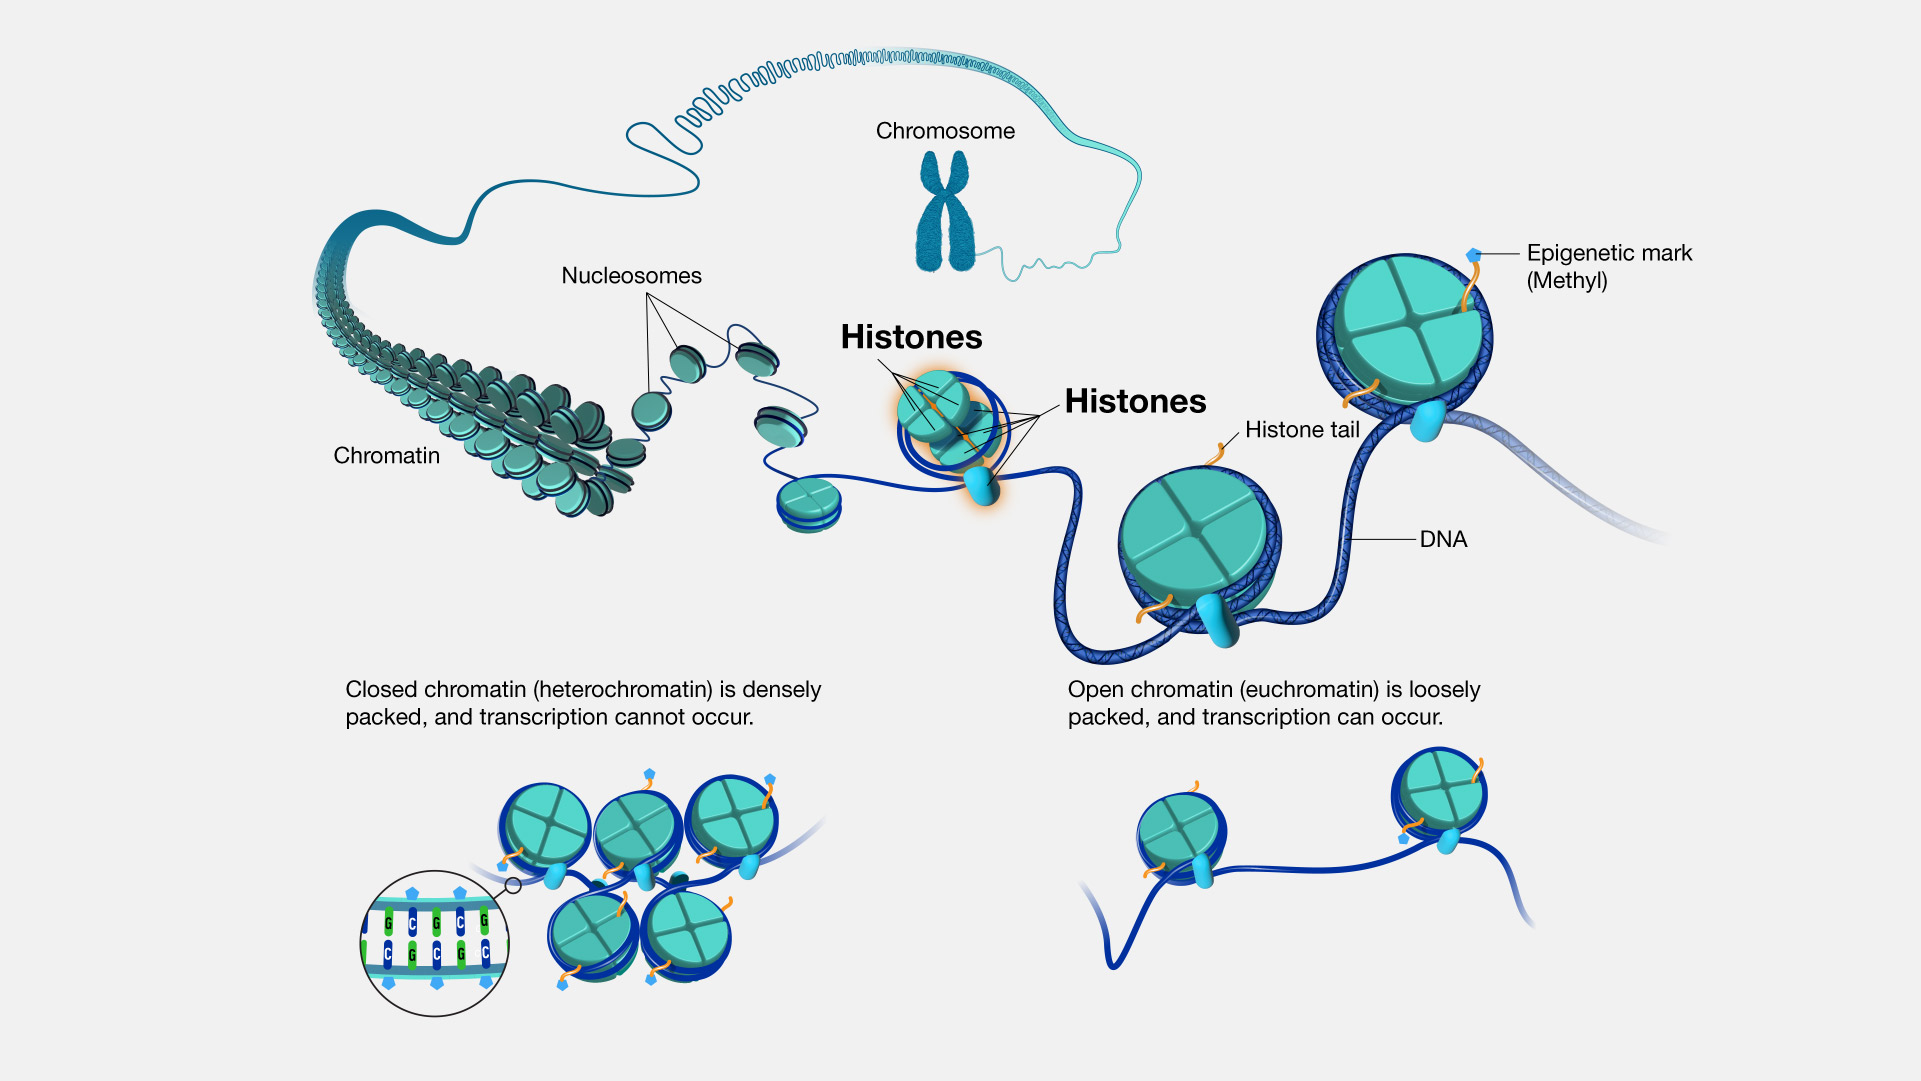


## DNase hypersensitivity
DNase hypersensitivity refers to regions of the genome that are particularly accessible to DNase I, an enzyme that cuts DNA. These regions, known as **DNase hypersensitive sites** (DHSs), indicate areas of open chromatin, typically correlating with active regulatory elements. DHSs are regions where the protein-DNA complex is not tightly bound, allowing accessibility for transcription factor binding, chromatin remodeling, and transcriptional machinery.

## CCCTC-binding factor (CTCF)

CTCF is a highly conserved and versatile DNA-binding protein that plays a crucial role in genome organization and gene regulation. CTCF binding sites are specific DNA sequences where CTCF binds, mediating its diverse functions. CTCF recognizes a specific DNA sequence motif, typically a 20–50 base pair region enriched with conserved core sequences.


In [28]:
#### loading the data again
selected_columns = pd.read_csv(train_file, usecols=[5, 6, 7, 8])


"""
We can see the data consists only of "A"s and "N"s. We can interpret this as a positionwise bit score 
where A is positive and N is negative
"""
selected_columns


,ctcf,dnase,h3k4me3,rrbs
0,AAAAAAAAAAAAAAAAAAAAAAA,AAAAAAAAAAAAAAAAAAAAAAA,AAAAAAAAAAAAAAAAAAAAAAA,NNNNNNNNNNNNNNNNNNNNNNN
1,NNNNNNNNNNNNNNNNNNNNNNN,AAAAAAAAAAAAAAAAAAAAAAA,AAAAAAAAAAAAAAAAAAAAAAA,NNANNNNNNNNNNNNNNNNNNNN
2,AAAAAAAAAAAAAAAAAAAAAAA,AAAAAAAAAAAAAAAAAAAAAAA,AAAAAAAAAAAAAAAAAAAAAAA,NNNNNNNNNNNNNNNNNNNNNNN
3,AAAANNNNNNNNNNNNNNNNNNN,AAAAAAAAAAAAAAAAAAAAAAA,AAAAAAAAAAAAAAAAAAAAAAA,NNNNNNNNNNNNNNNNNNNNNNN
4,NNNNNNNNNNNNNNNNNNNNNNN,AAAAAAAAAAAAAAAAAAAAAAA,AAAAAAAAAAAAAAAAAAAAAAA,NNNNNAANNNNNNNNNNNNNNNN
...,...,...,...,...
2328,AAAAAAAAAAAAAAAAAAAAAAA,AAAAAAAAAAAAAAAAAAAAAAA,AAAAAAAAAAAAAAAAAAAAAAA,NNNNNNNNNNNNNNNNNNNNNNN
2329,NNNNNNNNNNNNNNNNAAAAAAA,AAAAAAAAAAAAAAAAAAAAAAA,NNNNNNNNNNNNNNNNNNNNNNN,NNNNNNNNNNNNANNANNNNANN
2330,NNNNNNNNNNNNNNNNNNNNNNN,AAAAAAAAAAAAAAAAAAAAAAA,NNNNNNNNNNNNNNNNNNNNNNN,NNNNNNNNNNNNNNNNNNNNNNN
2331,NNNNNNNNNNNNNNNNNNNNNNN,AAAAAAAAAAAAAAAAAAAAAAA,NNNNNNNNNNNNNNNNNNNNNNN,NNNNNNNNNNNNNNNNNNNNNNN


In [29]:
import numpy as np


data_n = np.array(selected_columns)[:,0]

length_data_n = len(data_n)
epi = np.zeros((length_data_n, len(data_n[0])), dtype=int)
for l,data in enumerate(data_n):
    for i, bit in enumerate(data):
        if bit == "A":
            epi[l, i] = 1
        elif bit == "N":
            epi[l, i] = 0

epi



array([[1, 1, 1, ..., 1, 1, 1],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 1, 1, ..., 1, 1, 1]])

In [30]:
"""
We can now repeat this for all other features
"""

def epi_preprocess(lines):
    length = 23
    data_n = len(lines)
    epi = np.zeros((data_n, length), dtype=int)
    for l in range(data_n):
        data = lines[l]
        epi_temp = data
        for i in range(length):
            if epi_temp[i] in "A":
                epi[l, i] = 1
            elif epi_temp[i] in "N":
                epi[l, i] = 0
    return epi


data = np.array(selected_columns)
ctcf, dnase, h3k4me3, rrbs = epi_preprocess(data[:, 0]), epi_preprocess(data[:, 1]), epi_preprocess(
        data[:, 2]), epi_preprocess(data[:, 3])

In [40]:
def preprocess(file_path, usecols=[5, 6, 7, 8]):
    data = pd.read_csv(file_path, usecols=usecols)
    data = np.array(data)
    ctcf, dnase, h3k4me3, rrbs = epi_preprocess(data[:, 0]), epi_preprocess(data[:, 1]), epi_preprocess(
        data[:, 2]), epi_preprocess(data[:, 3])
    epi = []
    for i in range(len(data)):
        ctcf_t, dnase_t, h3k4me3_t, rrbs_t = pd.DataFrame(ctcf[i]), pd.DataFrame(dnase[i]), pd.DataFrame(
            h3k4me3[i]), pd.DataFrame(rrbs[i])
        epi_t = pd.concat([ctcf_t, dnase_t, h3k4me3_t, rrbs_t], axis=1) 
        epi_t = np.array(epi_t)
        epi.append(epi_t)
    epi = np.array(epi)
    return epi


#### full load function
def load_data(train_file):
    train_data = pd.read_csv(train_file, usecols=[4, 9])
    train_data = np.array(train_data)
    train_seq, train_y = train_data[:, 0], train_data[:, 1]
    train_seq = grna_preprocess(train_seq)

    train_epi = preprocess(train_file, [5, 6, 7, 8])
    train_y = np.array(train_y.reshape(len(train_y), -1))

    return train_seq, train_epi,train_y




## CNN Model Establishing

CNN-XG is organized in a sequential layer-by-layer structure, where the CNN model plays a key role in extracting deep features of sgRNA sequence and its corresponding epigenetic information. The CNN network contains a sgRNA sub-network for extracting features from sgRNA and an epigenetic stream sub-network for extracting features from the four epigenetic features. The two sub-networks are structurally identical and include three one-dimensional (1D) convolutional layers, three max-pooling layers, one flattening layer and four fully connected layers.

Taking the sgRNA part as an example, it accepts the 4 × 23 binary matrix as input. The first layer is a 1D convolution layer, which is applied to extract the sgRNA features using 64 convolution kernels of size 3. A rectified linear unit (ReLU) is subsequently used as the activation function to the convolution outputs. The max-pooling layer, applying a filter with window size 2 to the previous layers, is used to reduce the number of parameters. The remaining two convolution layers use 128 convolution kernels of size 3 and 256 convolution kernels of size 3. The structures of the following max-pooling layer are consistent with the first pooling layer, respectively. Outputs of the last pooling layer are joined together into one vector via flattening. After that, the features are followed by four fully connected layers with the sizes of 256, 128, 64 and 32, respectively. The features of the fourth fully connected layer from both sgRNA and epigenetic branches are concatenated by the “concatenate” operator. The outputs of the concatenation layer are input into the last fully connected layer of the merged CNN network. The final output layer consists of one neuron corresponding to the predicted score. Dropout is applied for the model regularization to avoid overfitting and the drop rate is determined to be 0.2.


## Putting together the model with both channels

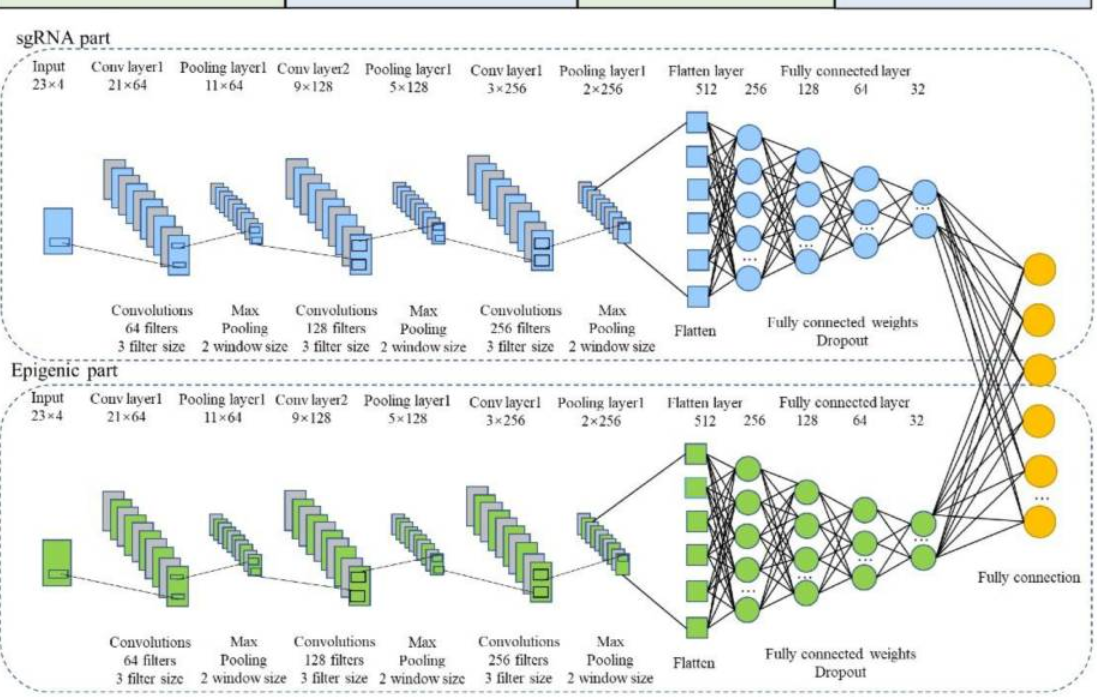


In [49]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class FullModel(nn.Module):
    def __init__(self):
        super(FullModel, self).__init__()
        self.seq_branch = ConvBranch()
        self.epi_branch = ConvBranch()
        self.fc_out = nn.Linear(32 * 2, 1)  # Merging 32 from each branch
        self.sigmoid = nn.Sigmoid()

    def forward(self, seq_input, epi_input):
        seq_out = self.seq_branch(seq_input)
        epi_out = self.epi_branch(epi_input)
        merged = torch.cat((seq_out, epi_out), dim=1)
        output = self.sigmoid(self.fc_out(merged))
        return merged, output


### Pre-Training of CNN

The architecture , called CNN-XG, is a predictive algorithm for predicting sgRNA on-target knockout efficacy. Before training the model, we first complete the pre-training and parameter determination of the CNN part. During the pretraining process, we randomly assigned the samples of the dataset with 90% of samples for training and 10% of samples for testing.

#### Differences to the original paper

In the original paper the authors perform five-fold CV for a complete evaluation of their approach and additionally introduce a validation set for early stopping. For the sake of brevity we only train on one random split here. 



In [50]:
import torch.optim as optim

def train_model(model, train_loader, val_loader, num_epochs=20, learning_rate=0.001):
    
    # Loss function and optimizer
    criterion = nn.BCELoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)
    
    # Training loop
    for epoch in range(num_epochs):
        model.train()  # Set the model to training mode
        running_loss = 0.0
        correct_predictions = 0
        total_predictions = 0
        
        # Training phase
        for seq_inputs,epi_input, labels in train_loader:
            
            optimizer.zero_grad()
            
            _, outputs = model(seq_inputs, epi_input)
            loss = criterion(outputs.squeeze().to(float), labels.to(float))
            
            loss.backward()
            optimizer.step()
            
            running_loss += loss.item() * labels.size(0)
            predictions = (outputs > 0.5).float()  # Assuming binary classification
            correct_predictions += (predictions.squeeze() == labels).sum().item()
            total_predictions += labels.size(0)
        
        # Calculate average loss and accuracy
        epoch_loss = running_loss / len(train_loader.dataset)
        epoch_accuracy = correct_predictions / total_predictions

        # Validation phase
        model.eval()  # Set the model to evaluation mode
        val_loss = 0.0
        val_correct = 0
        val_total = 0
        
        with torch.no_grad():
            for seq_inputs, epi_input, labels in val_loader:
                
                # Forward pass
                _, outputs = model(seq_inputs, epi_input)
                loss = criterion(outputs.squeeze().to(float), labels.to(float))
                
                val_loss += loss.item() * labels.size(0)
                predictions = (outputs > 0.5).float()
                val_correct += (predictions.squeeze() == labels).sum().item()
                val_total += labels.size(0)
        
        # Calculate validation loss and accuracy
        val_loss /= len(val_loader.dataset)
        val_accuracy = val_correct / val_total
        
        print(f"Epoch {epoch + 1}/{num_epochs}")
        print(f"Train Loss: {epoch_loss:.4f}, Train Accuracy: {epoch_accuracy:.4f}")
        print(f"Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_accuracy:.4f}")
        
    return

In [51]:
# Initialize model
from torch.utils.data import DataLoader, Dataset
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

class MyEpiDataset(Dataset):
    def __init__(self, data, epi_data, targets, transform=None):
        self.data = data
        self.epi_data = epi_data
        self.targets = targets

    def __getitem__(self, index):

        x = self.data[index]
        epi = self.epi_data[index]
        y = 1 if self.targets[index] > 0.5 else 0
        
        return x, epi, y
    
    def __len__(self):
        return len(self.data)

In [69]:
    

X_train, X_test, y_train, y_test = train_test_split(sgRNAs,target, test_size=0.1)

X_train = torch.tensor(X_train, dtype = torch.float32)
X_test =  torch.tensor(X_test, dtype = torch.float32)

full_model = FullModel()
dataset_train = MyEpiDataset(X_train, torch.ones(X_train.size()), 
                             torch.tensor(y_train, dtype = torch.float64))
dataset_test = MyEpiDataset(X_test, torch.ones(X_test.size()), 
                            torch.tensor(y_test, dtype = torch.float64))


train_loader = DataLoader(dataset_train, batch_size=32, shuffle=True)
val_loader = DataLoader(dataset_test, batch_size=32, shuffle=True)

train_model(full_model, train_loader, val_loader, num_epochs=100, learning_rate=0.001)

Epoch 1/100
Train Loss: 0.6126, Train Accuracy: 0.6665
Validation Loss: 0.5468, Validation Accuracy: 0.7233
Epoch 2/100
Train Loss: 0.5554, Train Accuracy: 0.7117
Validation Loss: 0.4627, Validation Accuracy: 0.7894
Epoch 3/100
Train Loss: 0.4988, Train Accuracy: 0.7511
Validation Loss: 0.3662, Validation Accuracy: 0.8495
Epoch 4/100
Train Loss: 0.4451, Train Accuracy: 0.7881
Validation Loss: 0.2840, Validation Accuracy: 0.9103
Epoch 5/100
Train Loss: 0.4011, Train Accuracy: 0.8145
Validation Loss: 0.2366, Validation Accuracy: 0.9368
Epoch 6/100
Train Loss: 0.3676, Train Accuracy: 0.8359
Validation Loss: 0.2182, Validation Accuracy: 0.9506
Epoch 7/100
Train Loss: 0.3413, Train Accuracy: 0.8498
Validation Loss: 0.1747, Validation Accuracy: 0.9613
Epoch 8/100
Train Loss: 0.3212, Train Accuracy: 0.8600
Validation Loss: 0.1739, Validation Accuracy: 0.9644
Epoch 9/100
Train Loss: 0.3037, Train Accuracy: 0.8696
Validation Loss: 0.1383, Validation Accuracy: 0.9693
Epoch 10/100
Train Loss: 0.2

Epoch 77/100
Train Loss: 0.1486, Train Accuracy: 0.9385
Validation Loss: 0.0482, Validation Accuracy: 0.9740
Epoch 78/100
Train Loss: 0.1480, Train Accuracy: 0.9388
Validation Loss: 0.0428, Validation Accuracy: 0.9735
Epoch 79/100
Train Loss: 0.1486, Train Accuracy: 0.9370
Validation Loss: 0.0490, Validation Accuracy: 0.9748
Epoch 80/100
Train Loss: 0.1489, Train Accuracy: 0.9372
Validation Loss: 0.0455, Validation Accuracy: 0.9745
Epoch 81/100
Train Loss: 0.1494, Train Accuracy: 0.9380
Validation Loss: 0.0461, Validation Accuracy: 0.9741
Epoch 82/100
Train Loss: 0.1494, Train Accuracy: 0.9388
Validation Loss: 0.0429, Validation Accuracy: 0.9740
Epoch 83/100
Train Loss: 0.1450, Train Accuracy: 0.9388
Validation Loss: 0.0472, Validation Accuracy: 0.9741
Epoch 84/100
Train Loss: 0.1484, Train Accuracy: 0.9383
Validation Loss: 0.0418, Validation Accuracy: 0.9744
Epoch 85/100
Train Loss: 0.1489, Train Accuracy: 0.9384
Validation Loss: 0.0457, Validation Accuracy: 0.9736
Epoch 86/100
Train 

In [53]:
X, epivalues, y = load_data(train_file = "./HEK293T.csv")

In [54]:
X_train_ind, X_test_ind, y_train, y_test = train_test_split(list(range(len(X))),y, test_size=0.1)


dataset_train = MyEpiDataset(torch.tensor(X[X_train_ind], dtype = torch.float32), 
                             torch.tensor(epivalues[X_train_ind], dtype = torch.float32), 
                             torch.tensor(list(y[X_train_ind].squeeze())))
dataset_test = MyEpiDataset(torch.tensor(X[X_test_ind], dtype = torch.float32), 
                            torch.tensor(epivalues[X_test_ind], dtype = torch.float32), 
                            torch.tensor(list(y[X_test_ind].squeeze())))


train_loader = DataLoader(dataset_train, batch_size=32, shuffle=True)
val_loader = DataLoader(dataset_test, batch_size=32, shuffle=True)

train_model(full_model, train_loader, val_loader, num_epochs=20, learning_rate=0.001)

Epoch 1/20
Train Loss: 0.5263, Train Accuracy: 0.8047
Validation Loss: 0.1207, Validation Accuracy: 0.9701
Epoch 2/20
Train Loss: 0.1510, Train Accuracy: 0.9686
Validation Loss: 0.1315, Validation Accuracy: 0.9744
Epoch 3/20
Train Loss: 0.1199, Train Accuracy: 0.9724
Validation Loss: 0.1210, Validation Accuracy: 0.9786
Epoch 4/20
Train Loss: 0.1086, Train Accuracy: 0.9724
Validation Loss: 0.1237, Validation Accuracy: 0.9786
Epoch 5/20
Train Loss: 0.0939, Train Accuracy: 0.9724
Validation Loss: 0.1153, Validation Accuracy: 0.9786
Epoch 6/20
Train Loss: 0.0953, Train Accuracy: 0.9724
Validation Loss: 0.1229, Validation Accuracy: 0.9744
Epoch 7/20
Train Loss: 0.0889, Train Accuracy: 0.9752
Validation Loss: 0.1181, Validation Accuracy: 0.9744
Epoch 8/20
Train Loss: 0.0739, Train Accuracy: 0.9776
Validation Loss: 0.1083, Validation Accuracy: 0.9786
Epoch 9/20
Train Loss: 0.0706, Train Accuracy: 0.9757
Validation Loss: 0.1210, Validation Accuracy: 0.9658
Epoch 10/20
Train Loss: 0.0654, Train

## XGBoost Model Training

XGBoost (Extreme Gradient Boosting) is a powerful, efficient, and scalable machine learning algorithm that builds upon the principles of gradient boosting to deliver superior performance on structured data tasks. It creates an ensemble of decision trees, where each new tree is added sequentially to correct the errors made by the previous ones. This iterative process minimizes a specified loss function (e.g., mean squared error for regression or log loss for classification) by using a gradient descent approach to optimize model predictions. What sets XGBoost apart is its focus on computational speed and model accuracy through innovative enhancements. It employs regularization techniques, such as L1 (Lasso) and L2 (Ridge) penalties, to prevent overfitting and improve model generalization. Advanced features like tree pruning using a maximum delta step, parallelized learning for faster training, and a weighted quantile sketch for optimal split-finding further enhance its efficiency and precision.

XGBoost is also highly flexible, supporting various loss functions, custom objective functions, and missing value handling by automatically learning their best placements in trees. The algorithm's built-in cross-validation and early stopping capabilities ensure robust performance tuning. It integrates seamlessly with distributed computing frameworks for handling large datasets, making it suitable for both small-scale applications and big data scenarios. XGBoost has become a go-to choice for many practitioners due to its ability to deliver state-of-the-art results in tasks like classification, regression, and ranking. It is particularly popular in data science competitions like Kaggle and in industry applications, excelling in predictive analytics for structured data problems where it often outperforms other algorithms.

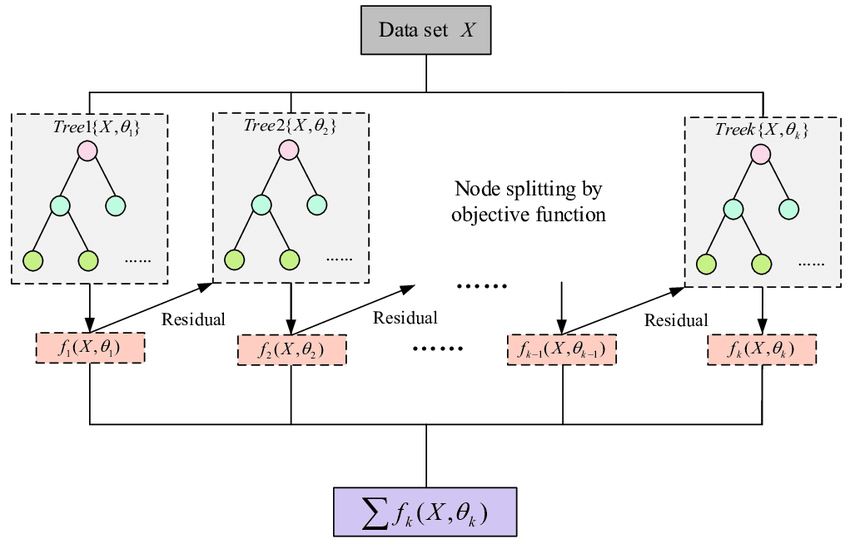

XGBoost (Extreme Gradient Boosting) combines principles from decision trees, gradient boosting, and optimization techniques to create a highly efficient and accurate machine learning algorithm. Here's a breakdown of the key concepts:


#### Objective Function

Using the objective function the XGBoost algorithm balances model fit and model complexity:

\begin{align}
L(\theta) = \sum_{i=1}^{n} l(y^{i},y_{pred}^{i}) + \sum_{k=1}^{K} \Omega(f_{k})
\end{align}

The first term defines the loss on a sample $y^{i}$ and a prediction $y_{pred}^{i}$ summed up for all possible samples
\begin{align}
 \sum_{i=1}^{n} l(y^{i},y_{pred}^{i})
\end{align}

The second term is a regularization term for all trees K XGBoost ues:

\begin{align}
\sum_{k=1}^{K} \Omega(f_{k}),with: \Omega(f_{k}) = \gamma T +\frac{1}{2} \lambda \lVert \omega \rVert ^2
\end{align}
Here T is the number of leaves in the tree $\omega$ are the tree leaf weights and $\gamma$ and $\lambda$ regularization parameter.


### Additive Model

When bulding the final model XGBoost works in a sequential manner, adding one tree after another to improve the prediction.

\begin{align}
y_{pred}^{i} = y_{pred}^{i-1} + f_{t}(x_{i})
\end{align}

with $f_{t}(x_{i})$ being the newly created tree meant to minimize the residual errors that remain after the prediction of the previous trees $y_{pred}^{i-1}$.


### How are new trees learned?

XGBoost uses gradient descent to minimize the loss function, approximated using the first and second derivative:


\begin{align}
L^{t} = \sum_{i=1}^{n} (g_{i} f_{t}(x_{i}) +0.5h_{i}f_{t}(x_{i})^2 ) + \Omega(t)
\end{align}

where $g_{i}$ is the first derivative of the loss and $h_{i}$ the second derivative of the loss. This Taylor Expansion gives us an approximation of the loss at the point. With this approximation we can optimize the new tree.

### Optimizing the new Tree Structure

XGBoost splits tree using the following scoring function:

\begin{align}
L_{split} = 0.5(\frac{G_{L}^2}{H{L} + \lambda} +\frac{G_{R}^2}{H{R} + \lambda} - \frac{(G_{L} + G_{R})^2 )}{H_{L} + H_{R} + \lambda}) - \gamma
\end{align}

where $G_{L}$ and $G_{R}$ are the gradient of the left and right child nodes, $H_{L}$ and $H_{R}$ the corresponding hressians, $\lambda$ the regularization term for the leaf weights and $\gamma$ the minimum gain required to make a new split.


### Prediction

Once the model is trained, the prediction for an instance $x_{i}$ is the simply the sum of all trees' outputs:


\begin{align}
y_{pred}^i=\sum_{k=1}^{K}f_{k}(x_{i})
\end{align}

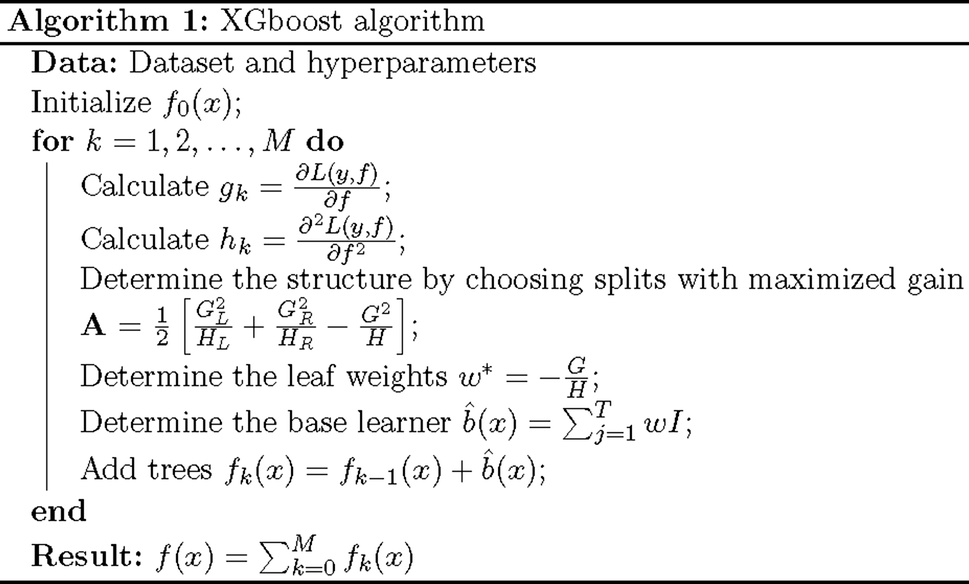



In [64]:
X_emb = torch.tensor(X[X_train_ind], dtype = torch.float32)
X_emb_test = torch.tensor(X[X_test_ind], dtype = torch.float32)
y_test =  torch.tensor([float(y) for y in y[X_test_ind]])

x_train,_ = model(X_emb)
x_train = x_train.detach()

x_test_part, _ = model(X_emb_test)
x_test_part = x_test_part.detach()


In [68]:
from xgboost import XGBClassifier,XGBRegressor
from sklearn.metrics import mean_absolute_error


xgmodel = XGBRegressor(learning_rate=0.1,
                               n_estimators=1000, 
                               max_depth=6, 
                               min_child_weight=1,
                               gamma=0.,
                               subsample=0.8,
                               colsample_bytree=0.8,
                               objective='reg:logistic',
                               eval_metric=mean_absolute_error,                       
                               scale_pos_weight=1,
                               random_state=27)
# xgmodel.compile(optimizer='adam', loss='binary_crossentropy', metrics=['auc'])
xgmodel.fit(x_train, y_train, eval_set=[(x_train, y_train)],
                    verbose=False)
y_pred = xgmodel.predict(x_test_part)
y_test = np.array(y_test).ravel()
y_test = list(y_test)

metric = mean_absolute_error(y_test, y_pred)
print(f"mean absoulte error: {metric}")

mean absoulte error: 0.08030807971954346


In [57]:
X_emb = torch.tensor(X[X_train_ind], dtype = torch.float32)
X_emb_test = torch.tensor(X[X_test_ind], dtype = torch.float32)

epi = torch.tensor(epivalues[X_train_ind], dtype = torch.float32)
epi_test = torch.tensor(epivalues[X_test_ind], dtype = torch.float32)
y_test =  torch.tensor([float(y) for y in y[X_test_ind]])

x_train,_ = full_model(X_emb, epi)
x_train = x_train.detach()

x_test, _ = full_model(X_emb_test, epi_test)
x_test = x_test.detach()


In [58]:
from xgboost import XGBClassifier,XGBRegressor
from sklearn.metrics import mean_absolute_error


xgmodel_full = XGBRegressor(learning_rate=0.1,
                               n_estimators=1000, 
                               max_depth=6, 
                               min_child_weight=1,
                               gamma=0.,
                               subsample=0.8,
                               colsample_bytree=0.8,
                               objective='reg:logistic',
                               eval_metric=mean_absolute_error,                       
                               scale_pos_weight=1,
                               random_state=27)
# xgmodel.compile(optimizer='adam', loss='binary_crossentropy', metrics=['auc'])
xgmodel_full.fit(x_train, y_train, eval_set=[(x_train, y_train)],
                    verbose=False)
y_pred = xgmodel_full.predict(x_test)
y_test = np.array(y_test).ravel()
y_test = list(y_test)

metric = mean_absolute_error(y_test, y_pred)
print(f"final mean absoulte error: {metric}")



final mean absoulte error: 0.07480692118406296


## Random forests

Random forests are a classification method, based around the idea of building multiple decision trees and combining their predictions. To ensure varity among the tree population, features and input data are usually subsampled and hence each tree is only build on a specific subset of the data.  

### Building a single decision tree


Building a decision tree is based on finding optimal splits that partition the data into subsets with improved homogeneity. A decision tree partitions data based on feature thresholds. That means that for a feature $X_{j}$ we want to find a threshold $t$ that allows us to split the data into two groups: $X_{j}<= t$ and $X_{j}> t$ that increase the homogeneity of the subsets.

#### Criteria for splits

To find out how a split influences the homogenety of the subset, we can use the Gini coefficient:

Gini Impurity = $1-\sum_{c=1}^{C} p_{c}^2$,

where $p_{c}$ is the proportion of samples belonging to class c at the node. For a split, the weighted average of the Gini impurity of the two resulting nodes is calculated:

\begin{align}
G_{split} = \frac{n_{L}}{n} G_{L} + \frac{n_{R}}{n} G_{R}
\end{align}

with $G_{L}$ and $G_{R}$ being the Gini coefficient for the left and right node, and $n_{L}$ and $n_{R}$ the corresponding number of samples in the subnodes.

#### Finding the best split


To find the best split for a feature $X_{j}$ we can sort the data according to $X_{j}$ and determine all points where the target variable changes. The corresponding features values can be used for that splits that are then evaluated using the Gini coefficient. 





## Feature Representation Optimization



The initial features were transformed by the CNN, and when the outputs of the two branches of sgRNA and epigenetics were connected together via a flattened layer, we obtained the 64-dimensional features. Considering too many features might cause redundancy, and part of the features did not play a role in predicting the results; we adopted a strategy of optimizing features. We used random forests for feature screening. With Scikit-learn, we trained a random forest model with 1000 decision trees and entered 64-dimensional features into a random forest model. We obtained the importance score of each feature. Figure 2 shows the importance score of all the features, and we put the top 15 features into the the XGBoost classifier for training to get the final model.


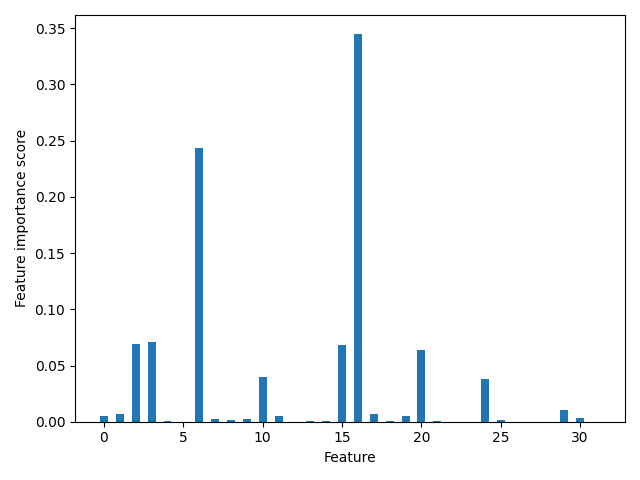


### How is feature importance determined?


**Measure Split Quality:**

1. At each split in a decision tree, the algorithm selects a feature and a threshold to split the data into two groups.

2. The "quality" of the split is determined by how much it reduces impurity. Impurity is a measure of the uncertainty in a node before and after splitting.

**Track Feature Contribution:**

Each time a feature is used to split a node, the reduction in impurity (weighted by the number of samples in the node) is recorded for that feature. These reductions are added up across all trees in the forest to compute the feature’s importance score.

### Gini importance for measuring split

For a tree node, the Gini impurity is defined as:

Gini Impurity = $1-\sum_{c=1}^{C} p_{c}^2$,

where $p_{c}$ is the proportion of samples belonging to class c at the node. 


#### Calculation of Gini Importance:

When a feature is used to split a node, it reduces the impurity of the node by splitting it into child nodes.
The importance of a feature is the sum of the impurity reductions it contributes across all the nodes and all the trees in the forest.


#### Weighted Reduction
The impurity reduction at each node is weighted by the number of samples passing through that node. 
\begin{align}
\Delta Impurity = Impurity_{parent} - (\frac{N_{left}}{N_{total}} * Impurity_{left} \frac{N_{right}}{N_{total}} * Impurity_{right})
\end{align}

#### Aggregating Across Trees
The total Gini importance is computed by summing up all its contributions across all the nodes where it was used for all the trees in the forest. 
\begin{align}
Feature Importance_{j} = \frac{\sum_{t=1}^{T} \sum_{s \in S_{t}}\Delta Impurity_{s,j}}{\sum_{t=1}^{T}\sum_{s \in S_{t}} \Delta Impurity_{s}}
\end{align}

with T being the total number of trees, $S_{t}$ the splits in a tree T, $\Delta Impurity_{s,j}$ the impurity reduction for feature j at split s. 






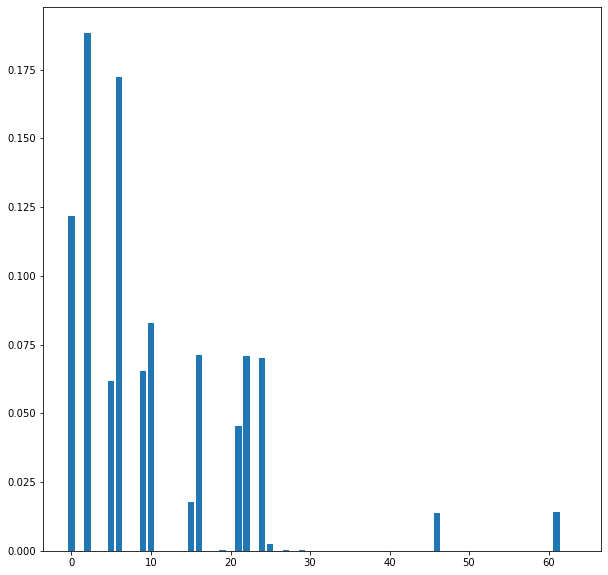

In [59]:
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

rf = RandomForestRegressor(n_estimators = 1000)
rf.fit(x_train, y_train.ravel())
importances = rf.feature_importances_

plt.figure(figsize=(10,10))
plt.bar(x =list(range(0,len(importances))), height = importances)
plt.show()

improtance_indece = np.argsort(importances)[-15:]

In [60]:
#selected_cnn_fea_cols = [0, 2, 4, 5, 8, 13, 14, 15, 21, 22, 24, 26, 29, 30, 32]
selected_cnn_fea_cols = improtance_indece
x_train_selected = x_train[:, selected_cnn_fea_cols]
x_test_selected = x_test[:, selected_cnn_fea_cols]

In [61]:
xgmodel_selected = XGBRegressor(learning_rate=0.1,
                               n_estimators=1000, 
                               max_depth=6, 
                               min_child_weight=1,
                               gamma=0.,
                               subsample=0.8,
                               colsample_bytree=0.8,
                               objective='reg:logistic',
                               eval_metric=mean_absolute_error,                       
                               scale_pos_weight=1,
                               random_state=27)
# xgmodel.compile(optimizer='adam', loss='binary_crossentropy', metrics=['auc'])
xgmodel_selected.fit(x_train_selected, y_train, eval_set=[(x_train_selected, y_train)],
                    verbose=False)
y_pred = xgmodel_selected.predict(x_test_selected)
y_test = np.array(y_test).ravel()
y_test = list(y_test)

metric = mean_absolute_error(y_test, y_pred)
print(f"final mean absoulte error: {metric}")


final mean absoulte error: 0.07444754987955093


## Support Vector Regression

"A Novel Hybrid CNN-SVR for CRISPR/Cas9 Guide RNA Activity Prediction" use Support Vector Regression instead of XGABoost. 


Support Vector Machines (SVMs) and Support Vector Regression (SVR) are powerful supervised learning algorithms used for classification and regression tasks, respectively, with a foundation in statistical learning theory. Both methods aim to find the optimal hyperplane (in SVM) or decision boundary (in SVR) that maximally separates data points or fits the best regression line in a high-dimensional feature space. The key concept behind SVMs is the use of support vectors, which are the data points closest to the decision boundary; these points determine the model's position and orientation in the feature space. By focusing on these critical data points, SVM achieves robust generalization, even with complex datasets.

SVMs are particularly effective for classification problems, where they maximize the margin between classes, ensuring that the decision boundary is as far as possible from data points of either class. This margin maximization reduces overfitting and enhances model stability. SVR, on the other hand, extends this idea to regression by finding a function that predicts target values within a specified margin of tolerance (epsilon) while minimizing model complexity.

Both SVM and SVR can handle non-linear relationships by using kernel functions such as the radial basis function (RBF), polynomial, or sigmoid kernels. These kernels transform the input data into a higher-dimensional space, where linear separability or regression becomes achievable. Additionally, regularization parameters like C control the trade-off between achieving a wide margin and minimizing classification or prediction error.

SVM and SVR excel in scenarios with high-dimensional data, complex relationships, and small to medium-sized datasets. However, they can be computationally intensive with very large datasets or when tuning kernel parameters. Despite these challenges, SVM and SVR remain highly versatile and widely used, offering reliable performance in applications ranging from image recognition and bioinformatics to financial modeling and predictive analytics.


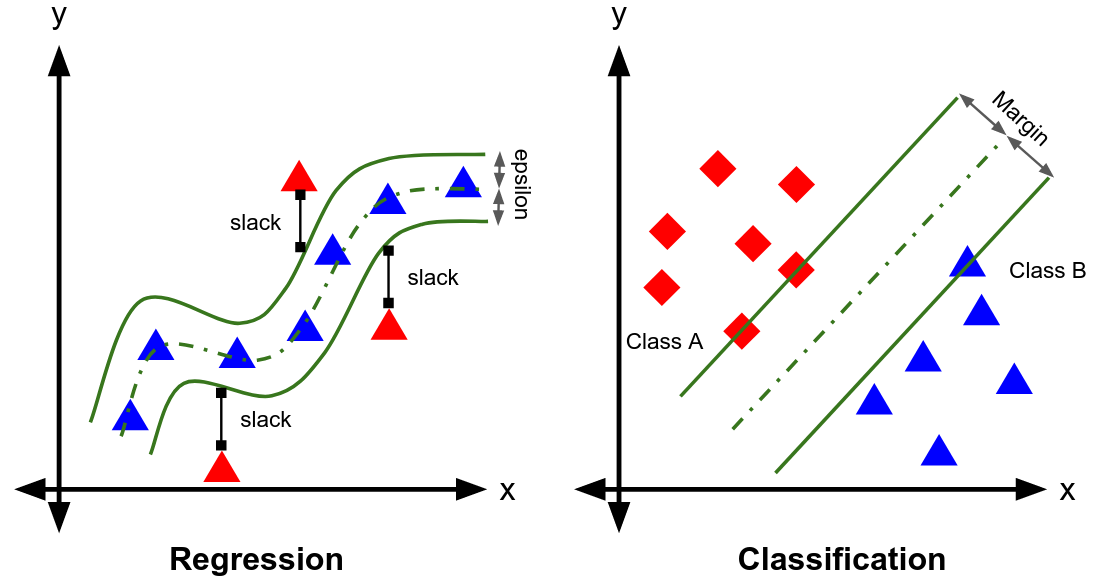

### The Regression Function

SVR seeks to approximate a function $f(x)$ of the form:
\begin{align}
f(x)=w^{T}x+b
\end{align}
where $w$ is the weight vector of the hyperplane, $x$ is the input feature vector and $b$ is the bias term:


###  Loss Function: Epsilon-Insensitive Loss

The key idea in SVR is the use of epsilon-insensitive loss $(\epsilon)$. This essentailly means that predictions within a margin of $±\epsilon$ from the true target value are considered "good enough," and no penalty is applied for errors within this range.

The loss function for SVR is then defined as:

\begin{align}
L_{\epsilon}(y, f(x)) = 0, if |y-f(x)| <= \epsilon, |y-f(x)|-\epsilon, otherwise
\end{align}

This means that only deviations larger than ϵ contribute to the loss.


### Optimization Problem

SVR minimizes a trade-off between model complexity and prediction error. The optimization problem can be formulated as:

\begin{align}
min_{\omega,b,\xi,\xi^{\star}} \frac{1}{2} \lVert \omega \rVert^{2} + C \sum_{i=1}^{n}(\xi_{i} - \xi_{i}^{\star})
\end{align}

which is subeject to:

\begin{align}
y_{i} - (w^{T}x_{i}+b) <= \epsilon + \xi_{i} \\
(w^{T}x_{i}+b) - y_{i} <= \epsilon + \xi_{i}^{\star} \\
\xi_{i}, \xi_{i}^{\star} > 0
\end{align}

Here the L2 norm $\lVert \omega \rVert^{2}$ minimizes the model complexity. C is a controll parameter the moderates the trade-off between fitting the model and allowing slack. $\xi_{i}, \xi_{i}^{\star}$ are the slack variables that allow some degree of deviation. 


### The Dual Formulation

To solve this optimization efficiently, the problem is expressed in its dual form using Lagrange multipliers

\begin{align}
max_{\alpha}{\alpha^{\star}} - \frac{1}{2} \sum_{i,j = 1}^{n} (\alpha_{i} - \alpha_{i}^{\star})(\alpha_{j} - \alpha_{j}^{\star})⟨x_{i},x_{j}⟩ + \sum_{i=1}^{n}y_{i} (\alpha_{i} - \alpha_{i}^{\star}) - \epsilon \sum_{i=1}^{n}(\alpha_{i} + \alpha_{i}^{\star}) 
\end{align}

Subject to: 
\begin{align}
\sum_{i=1}^{n} (\alpha_{i} - \alpha_{i}^{\star}) = 0 \\
0 <= \alpha_{i},\alpha_{i}^{\star} <= C
\end{align}

with $\alpha_{i}$ and $\alpha_{i}^{\star}$ being the Lagrange multipliers and $⟨x_{i},x_{j}⟩$ the dot product (or kernelized similarity).

### Kernel trick


If the data is not linearly separable, a kernel function $K(x_i,x_j)$ maps the input data into a higher-dimensional feature space where a linear hyperplane can be constructed. Common kernels include:

    Linear: K(xi,xj)=xiTxjK(xi​,xj​)=xiT​xj​
    Polynomial: K(xi,xj)=(xiTxj+c)dK(xi​,xj​)=(xiT​xj​+c)d
    Radial Basis Function (RBF): K(xi,xj)=exp⁡(−γ∥xi−xj∥2)K(xi​,xj​)=exp(−γ∥xi​−xj​∥2)

### SVR Prediction

Once the optimization is solved, the regression function is expressed as:


\begin{align}
f(x) = \sum_{i=1}^{n}(\alpha_{i} - \alpha_{i}^{\star})K(x_i,x_j)+b
\end{align}


Only the support vectors $α_i,α_i^{\star}$ contribute to the prediction, ensuring sparsity in the solution.

    
    
    


In [62]:
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

svr = make_pipeline(StandardScaler(), SVR(C=1.0, epsilon=0.2))
svr.fit(x_train_selected, y_train.ravel())

y_pred = svr.predict(x_test_selected)
y_test = np.array(y_test).ravel()
y_test = list(y_test)

metric = mean_absolute_error(y_test, y_pred)
print(f"final mean absoulte error: {metric}")


final mean absoulte error: 0.10009408230862049


## Final Evaluation

In [66]:
y_test = np.array(y_test).ravel()
y_test = list(y_test)


print("final model evaluation: ")
y_pred = svr.predict(x_test_selected)
metric = mean_absolute_error(y_test, y_pred)
print(f" mean absoulte error SVR: {metric}")


y_pred = xgmodel_full.predict(x_test)
metric = mean_absolute_error(y_test, y_pred)
print(f" mean absoulte error full XGBoost Model: {metric}")


y_pred = xgmodel.predict(x_test_part)
metric = mean_absolute_error(y_test, y_pred)
print(f" mean absoulte error XGBoost Model: {metric}")


y_pred = xgmodel_selected.predict(x_test_selected)
metric = mean_absolute_error(y_test, y_pred)
print(f" mean absoulte error XGBoost Model (selected features)): {metric}")




final model evaluation: 
 mean absoulte error SVR: 0.10009408230862049
 mean absoulte error full XGBoost Model: 0.07480692118406296
 mean absoulte error XGBoost Model: 0.08030807971954346
 mean absoulte error XGBoost Model (selected features)): 0.07444754987955093
